In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression # 공식
from sklearn.neural_network import MLPRegressor # 학습

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

1. electric.csv  w, b를 구하시고  
전기생산량이 3.2, 4.5 인경우 전기 사용량을 예측하시요.  
scatter(실제데이터), plot(예측데이터)를 그리시요.  

In [10]:
# 데이터 불러오기
df = pd.read_csv('data/electric.csv')
# 첫 번째 행 제외
df = df[['전기생산량', '전기사용량']]
df.head()

,전기생산량,전기사용량
0,3.52,2.48
1,2.58,2.27
2,3.31,2.47
3,4.07,2.77
4,4.62,2.98


In [11]:
# x, y 설정
x_data = df[['전기생산량']]
y_data = df[['전기사용량']]

In [12]:
# 모델 학습
model_electric = LinearRegression()
model_electric.fit(x_data, y_data)

LinearRegression()

In [16]:
# w, b 구하기
w = model_electric.coef_
b = model_electric.intercept_
print(f'w = {w[0][0]}, b = {b[0]}')

w = 0.4956032360182904, b = 0.919581428068942


In [25]:
# 전기 생산량이 3.2, 4.5인 경우 전기 사용량을 예측
pred_electric = model_electric.predict([[3.2],[4.5]])
print(f'3.2 -> {pred_electric[0][0]}')
print(f'4.5 -> {pred_electric[1][0]}')

3.2 -> 2.5055117833274716
4.5 -> 3.149795990151249


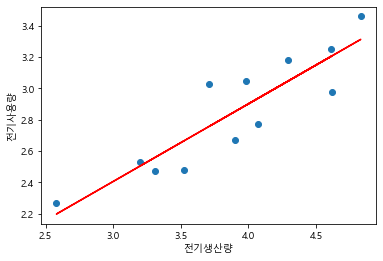

In [28]:
# scatter & 예측선
pred_electric = model_electric.predict(x_data)

plt.xlabel('전기생산량')
plt.ylabel('전기사용량')
plt.scatter(x_data, y_data)
plt.plot(x_data, pred_electric, color = 'r')
plt.show()

2. 선형회귀 통계공식을 파이썬코드로 직접 구현해서 1번데이터 w,b를 구하시요

In [33]:
x = np.array(df['전기생산량'])
y = np.array(df['전기사용량'])
n = len(x)
learning_rate = 0.01
epochs = 1000
w = 5
b = 5

def show(x,y,learning_rate, epochs):
    hist = []
    w = 5
    b = 5
    for i in range(epochs):
        hy = w*x + b
        cost = np.sum((hy-y)**2)/n
        hist.append(cost)
        gradientW = np.sum( (w*x+b -y)*2*x )/n
        gradientB = np.sum( (w*x+b -y)*2 )/n
        w = w- learning_rate*gradientW
        b = b- learning_rate*gradientB
        print('cost:',cost, 'w:',w,'b:',b)
    
    print('최종 w:',w)
    print('최종 b:',b)

    
show(x,y,learning_rate,epochs)

cost: 473.89335 w: 3.2869503333333334 b: 4.5684
cost: 213.2161933096854 w: 2.1383437683434443 b: 4.278535959099999
cost: 95.9991408809873 w: 1.368235403084297 b: 4.083715929117713
cost: 43.29082939682471 w: 0.8519362820130996 b: 3.952629719715709
cost: 19.58972997311891 w: 0.5058338109151165 b: 3.8642816762089773
cost: 8.932108734246674 w: 0.273859945272803 b: 3.804592755576693
cost: 4.139660765908588 w: 0.11841717187886192 b: 3.7641219827174623
cost: 1.9845659450043733 w: 0.01429375005207549 b: 3.7365385288081256
cost: 1.015392091947929 w: -0.05541654122120511 b: 3.717597133852917
cost: 0.5794834540090914 w: -0.10205049587181461 b: 3.7044510564287463
cost: 0.38336470547558266 w: -0.1332102206259007 b: 3.6951913588294114
cost: 0.2950707690792192 w: -0.15399345536730702 b: 3.688537965795456
cost: 0.25526179540477056 w: -0.16781858828666327 b: 3.6836324979615864
cost: 0.23725483310702147 w: -0.17697788576933862 b: 3.6798993523122285
cost: 0.22905153869794384 w: -0.1830084714123273 b: 3.6

cost: 0.17002392038782296 w: -0.09692583780968897 b: 3.2792551113544404
cost: 0.16988225650043232 w: -0.09663606994989611 b: 3.2781011467251644
cost: 0.16974073113655364 w: -0.09634644379692624 b: 3.276947746425768
cost: 0.16959934416073394 w: -0.09605695928147964 b: 3.275794910180274
cost: 0.1694580954376531 w: -0.09576761633429054 b: 3.2746426377128395
cost: 0.16931698483212307 w: -0.09547841488612696 b: 3.273490928747757
cost: 0.16917601220908815 w: -0.09518935486779086 b: 3.2723397830094543
cost: 0.1690351774336243 w: -0.094900436210118 b: 3.2711892002224925
cost: 0.16889448037094013 w: -0.09461165884397796 b: 3.270039180111569
cost: 0.1687539208863755 w: -0.09432302270027416 b: 3.2688897224015148
cost: 0.168613498845402 w: -0.09403452770994379 b: 3.267740826817296
cost: 0.16847321411362293 w: -0.0937461738039578 b: 3.2665924930840124
cost: 0.1683330665567729 w: -0.0934579609133209 b: 3.2654447209268995
cost: 0.16819305604071796 w: -0.09316988896907155 b: 3.2642975100713265
cost: 0

cost: 0.13077188419596186 w: -0.010329020516900213 b: 2.9343940068993373
cost: 0.13066860221380236 w: -0.010081601590721181 b: 2.9334086916555138
cost: 0.13056542122409148 w: -0.009834303661225488 b: 2.9324238582660027
cost: 0.13046234112807573 w: -0.009587126669241454 b: 2.9314395064951597
cost: 0.1303593618270978 w: -0.009340070555626278 b: 2.9304556361074567
cost: 0.13025648322259722 w: -0.009093135261266157 b: 2.92947224686748
cost: 0.13015370521610972 w: -0.00884632072707616 b: 2.9284893385399307
cost: 0.13005102770926716 w: -0.00859962689400024 b: 2.9275069108896257
cost: 0.12994845060379787 w: -0.008353053703011228 b: 2.926524963681497
cost: 0.12984597380152618 w: -0.008106601095110876 b: 2.925543496680591
cost: 0.12974359720437237 w: -0.007860269011329739 b: 2.9245625096520693
cost: 0.1296413207143526 w: -0.0076140573927272245 b: 2.9235820023612082
cost: 0.12953914423357896 w: -0.007367966180391551 b: 2.922601974573399
cost: 0.12943706766425914 w: -0.007121995315439769 b: 2.921

cost: 0.10147960626283238 w: 0.06550948064631258 b: 2.6323765645845945
cost: 0.10140496721349129 w: 0.06571981183934461 b: 2.631538946646684
cost: 0.10133040114861663 w: 0.06593004017291819 b: 2.6307017383338334
cost: 0.10125590799684188 w: 0.06614016569733526 b: 2.6298649394457208
cost: 0.10118148768687026 w: 0.06635018846287317 b: 2.6290285497821233
cost: 0.10110714014747467 w: 0.06656010851978468 b: 2.6281925691429158
cost: 0.10103286530749768 w: 0.06676992591829796 b: 2.62735699732807
cost: 0.10095866309585154 w: 0.06697964070861664 b: 2.626521834137657
cost: 0.10088453344151783 w: 0.06718925294091979 b: 2.6256870793718443
cost: 0.10081047627354776 w: 0.06739876266536193 b: 2.624852732830898
cost: 0.10073649152106172 w: 0.06760816993207308 b: 2.624018794315181
cost: 0.10066257911324966 w: 0.06781747479115872 b: 2.6231852636251554
cost: 0.10058873897937053 w: 0.06802667729269983 b: 2.622352140561379
cost: 0.10051497104875252 w: 0.0682357774867529 b: 2.621519424924509
cost: 0.1004412

3. (3x+2)^3 에 대한 미분에 대한 전개과정을  
적으시요. (코딩이 아닌 과정을 텍스트로 적으면 됨)

(3x+2)^3
3(3x+2)^2 * (3)
9(3x+2)^2